1.1 Goals

Extend the regression model routines to support multiple features

Extend data structures to support multiple features

Rewrite prediction, cost and gradient routines to support multiple features

Utilize NumPy np.dot to vectorize their implementations for speed and simplicity

In [3]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.

X_train = np.array([[2104, 5, 1, 45],[1416, 3, 2, 40], [852, 2, 1, 36]])
y_train = np.array([460, 232, 178])

In [9]:
# data is stored in a numpy array

print(f"X Shape: {X_train.shape}, X Type: {type(X_train)}")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type: {type(y_train)}")
print(y_train)

X Shape: (3, 4), X Type: <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   36]]
y Shape: (3,), y Type: <class 'numpy.ndarray'>
[460 232 178]


In [12]:
# For demonstration,  𝐰 and  𝑏 will be loaded with some initial selected values that are near the optimal.  
# 𝐰 is a 1-D NumPy vector.

b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"b_init.type: {type(b_init)} and w_init.shape: {w_init.shape}")

b_init.type: <class 'float'> and w_init.shape: (4,)


In [13]:
# Single prediction using linear regression
def predict_single_loop(x, w, b):
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
      p_i = x[i] * w[i]
      p += p_i
    p = p + b
    return p

In [19]:
x_vec = X_train[0, :]
print(f"x_vec.shape: {x_vec.shape}, x_vec values: {x_vec}")

f_wb= predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb.shape: {f_wb.shape}, f_wb value: {f_wb}")

x_vec.shape: (4,), x_vec values: [2104    5    1   45]
f_wb.shape: (), f_wb value: 459.9999976194083


In [17]:
# Single prediction using vectorized operations

def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x,w) + b
    return p

In [20]:
# get a row from the training data
x_vec = X_train[0, :]

f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb.shape: {f_wb.shape}, f_wb value: {f_wb}")

f_wb.shape: (), f_wb value: 459.9999976194083


# Compute the cost with multiple variables

In [28]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [29]:
# compute cost for the training data
print(f"X_train.shape: {X_train.shape}, \nX_train: {X_train}") 
print(f"y_train.shape: {y_train.shape}, \ny_train: {y_train}")
print(f"w_init.shape: {w_init.shape}, \nw_init: {w_init}")
print(f"b_init: {b_init}")

cost = compute_cost(X_train, y_train, w_init, b_init)
[print(f"cost at optimal w,b: {cost}")]

X_train.shape: (3, 4), 
X_train: [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   36]]
y_train.shape: (3,), 
y_train: [460 232 178]
w_init.shape: (4,), 
w_init: [  0.39133535  18.75376741 -53.36032453 -26.42131618]
b_init: 785.1811367994083
cost at optimal w,b: 116.34766701431086


[None]

# Comput Gradient With Multiple Variables

In [35]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros((n))
    dj_db = 0.
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i] 
        for j in range(n):
            dj_dw[j] += err * X[i][j]
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [39]:
# compute and display the gradient for the training data
dj_dw, dj_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f"dj_dw at w_init: {dj_dw}")
print(f"dj_db at b_init: {dj_db}")

dj_dw at w_init: [-7503.65652136   -17.61421706    -8.80710761  -317.05586374]
dj_db at b_init: -8.807107067258434


# Gradient Descent With Multiple Variables

In [44]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """

    # An array to store the cost J and w at each iteration primarily for plotting a graph
    cost_history = []
    w = copy.deepcopy(w_in) # avoid modifying w within function 
    b = b_in 
    
    for i in range(num_iters):
        
        # calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(X, y, w, b)
        
        #update w and b 
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Store the cost J for visualization
        if i < 1000000: # limit the size of the cost_history
          cost = cost_function(X, y, w, b)
          cost_history.append(cost)
        
        # Print the cost every 10 time or as many iterations if less than 10
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_history[-1]:8.2f}   ")
    return w, b, cost_history
        
    

In [45]:
# initialize parameters 
initial_w = np.zeros_like(w_init)
initial_b = 0.

# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# Run gradient descent
w_final, b_final, cost_history = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f}, {w_final}")

m,n = X_train.shape
for i in range(m):
    y_hat = np.dot(X_train[i], w_final) + b_final
    print(f"y_hat(prediction): {y_hat:0.2f}, y(target): {y_train[i]}")
    

Iteration    0: Cost  2529.59   
Iteration  100: Cost   696.01   
Iteration  200: Cost   694.97   
Iteration  300: Cost   693.94   
Iteration  400: Cost   692.91   
Iteration  500: Cost   691.90   
Iteration  600: Cost   690.90   
Iteration  700: Cost   689.91   
Iteration  800: Cost   688.92   
Iteration  900: Cost   687.95   
b,w found by gradient descent: -0.00, [ 0.20394608  0.00374951 -0.01124835 -0.06478118]
y_hat(prediction): 426.19, y(target): 460
y_hat(prediction): 286.18, y(target): 232
y_hat(prediction): 171.42, y(target): 178


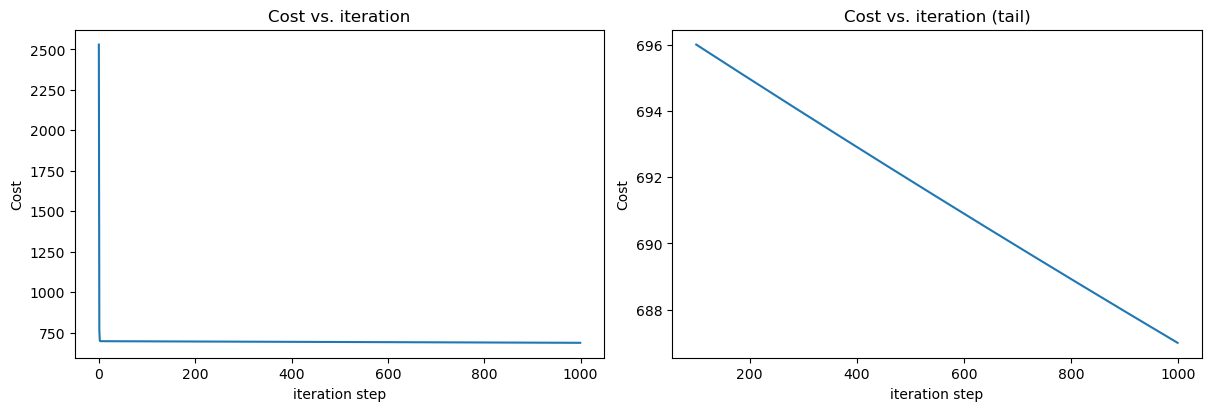

In [50]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_history)
ax2.plot(100 + np.arange(len(cost_history[100:])), cost_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

# In this notebook you:

-Redeveloped the routines for linear regression, now with multiple variables.
-Utilized NumPy np.dot to vectorize the implementations